In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_state:str 

In [2]:
def first_node(state):
    print("My First Node is called")
    return {"graph_state":state['graph_state']+"I am playing"}

def Second_node(state):
    print("My First Node is called")
    return {"graph_state":state['graph_state']+" Cricket"}

def Third_node(state):
    print("My First Node is called")
    return {"graph_state":state['graph_state']+" Badminton"}

In [3]:
import random
from typing import Literal
def decide_play(state) -> Literal['Second_node', 'Third_node']:
    graph_state = state['graph_state']

    if random.random()<0.5:
        return "Second_node"
    return "Third_node"

## Graph

- state graph
    - node
    - eadges

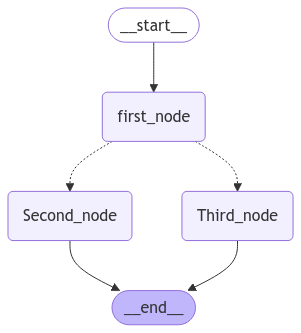

In [4]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
builder = StateGraph(State)

builder.add_node("first_node", first_node)
builder.add_node("Second_node", Second_node)
builder.add_node("Third_node", Third_node)


## Logic
builder.add_edge(START, "first_node")
builder.add_conditional_edges("first_node", decide_play)
builder.add_edge("Second_node", END)
builder.add_edge("Third_node", END)


## Add
graph =  builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({'graph_state':"Hi my name is saurabh, "})

My First Node is called
My First Node is called


{'graph_state': 'Hi my name is saurabh, I am playing Cricket'}

## Basic Chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [8]:
graph_builder = StateGraph(State)

In [9]:
import os 
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [10]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x77a6cbea98e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x77a6cbeaa930>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [11]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [12]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


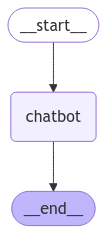

In [13]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value['messages'][-1].content)

In [16]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodby!")
            break

        stream_graph_updates(user_input)

    except:
        user_input = "What do you know about langGraph?"
        print("User: "+ user_input)
        stream_graph_updates(user_input)
        break


Assistant: Hi Saurabh, it's nice to meet you! 👋 

What can I do for you today? 😊  


Assistant: Hi! 👋 

How can I help you today?

Assistant: Here are some of the most important topics in machine learning, broken down into categories:

**Fundamentals**

* **Supervised Learning:**  Training models on labeled data to predict outcomes (e.g., classification, regression).
    * **Algorithms:** Linear Regression, Logistic Regression, Support Vector Machines (SVMs), Decision Trees, Random Forests, Naive Bayes, k-Nearest Neighbors.
* **Unsupervised Learning:** Discovering patterns and structures in unlabeled data (e.g., clustering, dimensionality reduction).
    * **Algorithms:** K-Means Clustering, Hierarchical Clustering, Principal Component Analysis (PCA), t-SNE.
* **Reinforcement Learning:** Training agents to make decisions in an environment to maximize rewards (e.g., game playing, robotics).
    * **Concepts:** States, Actions, Rewards, Policy, Value Function.
* **Model Evaluation:**  Me